# Model Performance and Comparison

To measure the performance of a model, we need several elements

**Confusion matrix** : also known as the error matrix, allows visualization of the performance of an algorithm

    True Positive (TP) : Transaction correctly identified as fraud
    True Negative (TN) : Transaction correctly identified as not fraud
    False Positive (FP) : Transaction incorrectly identified as fraud
    False Negative (FN) : Transaction incorrectly identified as not fraud

**Metrics**

    Accuracy : (TP + TN) / (TP + TN + FP +FN)
    Precision : TP / (TP + FP)
    Recall : TP / (TP + FN)
    F1 score : 2 x ((Precision x Recall) / (Precision + Recall))

**Roc Curve** : The ROC curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings.

**Precision Recall Curve** :  Shows the tradeoff between precision and recall for different threshold

### 1.1. Load libraries

Loading the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
import warnings
warnings.filterwarnings('ignore')

Setting the default values for plots

In [2]:
plt.rc('axes', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('xtick', labelsize=13)
plt.rc('ytick', labelsize=13)
plt.rc('figure', titlesize=35)
plt.rc('legend', fontsize=12)

### 1.2. Read data

Reading the data with pandas

In [3]:
df=pd.read_csv('new_data.csv')

## 2. Overview

### 2.1. Head

Checking data head

In [4]:
df.head()

,isFraud,amount_new,oldbalanceOrg_new,newbalanceOrig_new,oldbalanceDest_new,newbalanceDest_new
0,1,-4.096788,0.039564,-0.331128,-1.873353,-3.863134
1,1,-4.096788,0.039564,-0.331128,-0.917296,-3.863134
2,0,0.287913,0.856874,-0.331128,-1.191649,-1.591587
3,0,0.234287,0.297420,-0.331128,-0.904629,-3.863134
4,0,0.558130,0.795608,-0.331128,-1.156117,0.805223


### 2.2. Splitting Dataset

Splitting the target variable in y and all the other features in X

In [5]:
X = df.drop(['isFraud'],axis=1)
y = df.isFraud

## 3. Machine Learning

We will train out data on different machine learning models and use different techniques on each model and then compare our finding at the end to determine which model is working best for out data.

In [6]:
avg_accuracies={}
accuracies={}
roc_auc={}
pr_auc={}

In [7]:
def cal_score(name,model,folds):
    scores = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
    avg_result=[]
    for sc in scores:
        scores = cross_val_score(model, X, y, cv = folds, scoring = sc)
        avg_result.append(np.average(scores))
    df_avg_score=pd.DataFrame(avg_result)
    df_avg_score= df_avg_score.rename(index={0: 'Accuracy', 1:'Precision', 2:'Recall',3:'F1 score',4:'Roc auc'},columns={0:'Average'})
    avg_accuracies[name]=np.round(df_avg_score.loc['Accuracy']*100,3)
    values=[np.round(df_avg_score.loc['Accuracy']*100,3),np.round(df_avg_score.loc['Precision']*100,3),np.round(df_avg_score.loc['Recall']*100,3),np.round(df_avg_score.loc['F1 score']*100,3),np.round(df_avg_score.loc['Roc auc']*100,3)]
    plt.figure(figsize=(15,8))
    sns.set_palette('mako')
    ax=sns.barplot(x=['Accuracy','Precision','Recall','F1 score','Roc auc'],y=values)
    plt.yticks(np.arange(0,100,10))
    plt.ylabel('Percentage %',labelpad=10)
    plt.xlabel('Scoring Parameters',labelpad=10)
    plt.title('Cross Validation '+str(folds)+'-Folds Average Scores',pad=20)
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x(), p.get_height()),xytext=(p.get_x()+0.3,p.get_height()+1.02))
    plt.show()

In [8]:
def conf_matrix(ytest,pred):
    plt.figure(figsize=(9,6))
    global cm1
    cm1 = confusion_matrix(ytest, pred)
    ax=sns.heatmap(cm1, annot= True, cmap='Blues')
    plt.title('Confusion Matrix',pad=20)

In [9]:
def metrics_score(cm):
    total=sum(sum(cm))
    accuracy=(cm[0,0]+cm[1,1])/total
    precision = cm[1,1]/(cm[0,1]+cm[1,1])
    sensitivity = cm[1,1]/(cm[1,0]+cm[1,1])
    f1 = 2 * (precision * sensitivity) / (precision + sensitivity)
    specificity = cm[0,0]/(cm[0,1]+cm[0,0])
    values=[np.round(accuracy*100,3),np.round(precision*100,3),np.round(sensitivity*100,3),np.round(f1*100,3),np.round(specificity*100,3)]
    plt.figure(figsize=(15,8))
    sns.set_palette('magma')
    ax=sns.barplot(x=['Accuracy','Precision','Recall','F1 score','Specificity'],y=values)
    plt.yticks(np.arange(0,100,10))
    plt.ylabel('Percentage %',labelpad=10)
    plt.xlabel('Scoring Parameter',labelpad=10)
    plt.title('Metrics Scores',pad=20)
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x(), p.get_height()),xytext=(p.get_x()+0.3,p.get_height()+1.02))
    plt.show()

In [10]:
def plot_roc_curve(fpr, tpr):
    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, color='Orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='black', linestyle='--')
    plt.ylabel('True Positive Rate',labelpad=10)
    plt.xlabel('False Positive Rate',labelpad=10)
    plt.title('Receiver Operating Characteristic (ROC) Curve',pad=20)
    plt.legend()
    plt.show()

### 3.1. Logistic Regression

The logistic model is a statistical model that models the probability of one event taking place by having the log-odds for the event be a linear combination of one or more independent variables.

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 5)
lr = LogisticRegression()
lr.fit(X_train, y_train)
prediction1 = lr.predict(X_test)
accuracy1 = lr.score(X_test, y_test) 
print ('Model Accuracy:',accuracy1 * 100)

Model Accuracy: 99.81158023541641


Storing model accuracy to plot for comparison with other Machine Learning models.

In [42]:
accuracies['Logistic Regression'] = np.round(accuracy1 * 100,3)

Plotting Confusion Matrix to describe the performance of Logistic Regression on a set of test data.

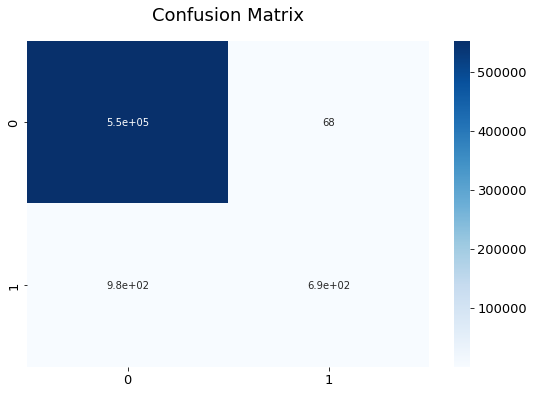

In [43]:
conf_matrix(y_test,prediction1)

Plotting different metrics scores for the Logistic Regression for evaluation.

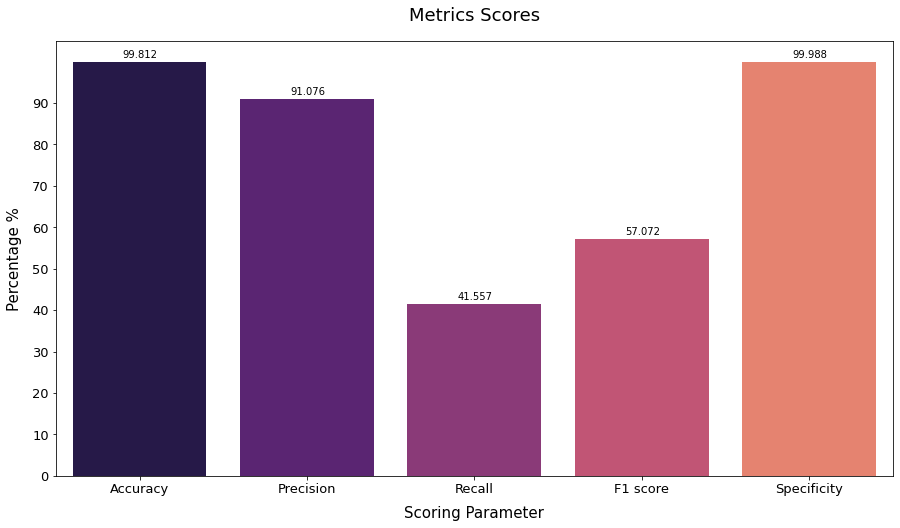

In [44]:
metrics_score(cm1)

Plotting Receiver Operating Characteristic (ROC) Curve, to illustrate the diagnostic ability of Logistic Regression as its discrimination threshold is varied and showing the Area under the ROC Curve (AUC) value which will tell us how much our model is capable of distinguishing between Fraud and Not Fraud.

Area under the ROC Curve (AUC): 0.98


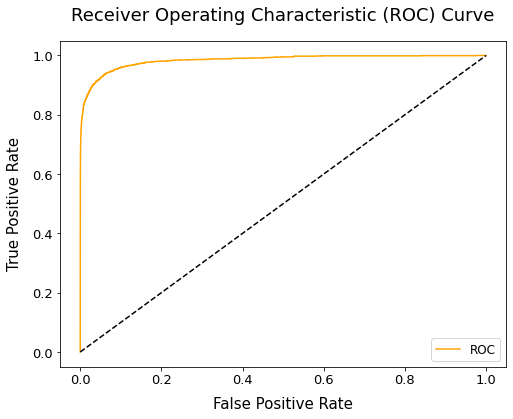

In [45]:
probs = lr.predict_proba(X_test)
probs = probs[:, 1]
auc1 = roc_auc_score(y_test, probs)
roc_auc['Logistic Regression']=np.round(auc1,3)
print('Area under the ROC Curve (AUC): %.2f' % auc1)
fpr1, tpr1, _ = roc_curve(y_test, probs)
plot_roc_curve(fpr1, tpr1)

### 3.2. K-Nearest Neighbors

KNN is a non-parametric, lazy learning algorithm. Its purpose is to use a database in which the data points are separated into several classes to predict the classification of a new sample point.

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 5)
knn = KNeighborsClassifier(n_neighbors =7 )
knn.fit(X_train, y_train)
prediction2 = knn.predict(X_test)
accuracy2 = knn.score(X_test, y_test) 
print ('Model Accuracy:',accuracy2 * 100)

Model Accuracy: 99.89658570392108


Storing model accuracy to plot for comparison with other Machine Learning models.

In [47]:
accuracies['KNN'] = np.round(accuracy2 * 100,3)

Plotting Confusion Matrix to describe the performance of K-Nearest Neighbours Classifier on a set of test data.

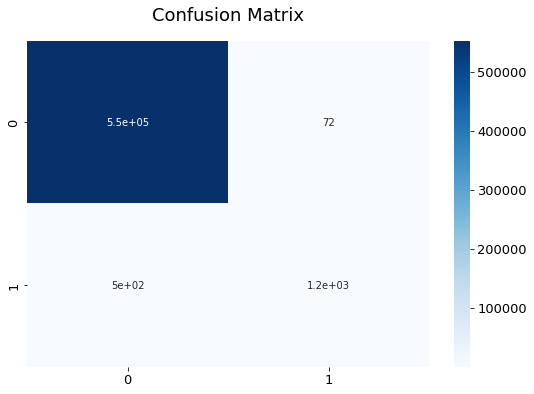

In [48]:
conf_matrix(y_test,prediction2)

Plotting different metrics scores for the K-Nearest Neighbours Classifier for evaluation.

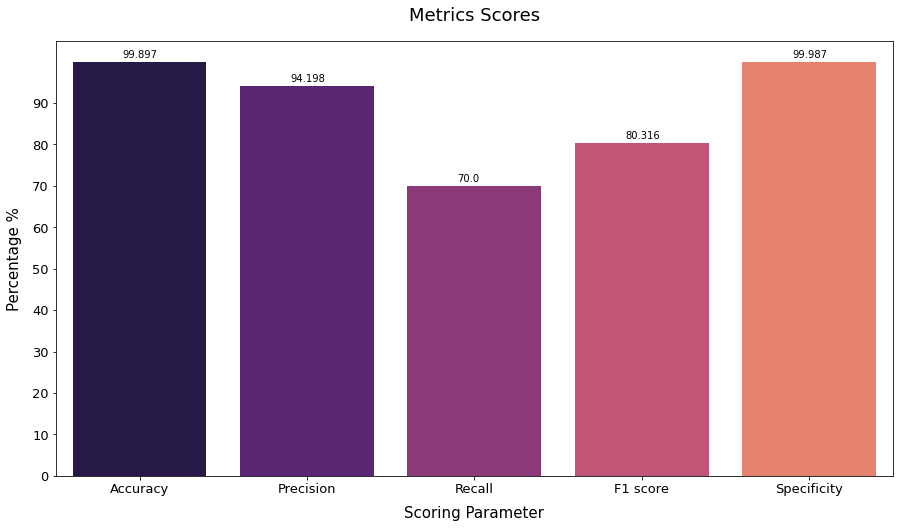

In [49]:
metrics_score(cm1)

Plotting Receiver Operating Characteristic (ROC) Curve, to illustrate the diagnostic ability of K-Nearest Neighbours Classifier as its discrimination threshold is varied and showing the Area under the ROC Curve (AUC) value which will tell us how much our model is capable of distinguishing between Fraud and Not Fraud.

Area under the ROC Curve (AUC): 0.93


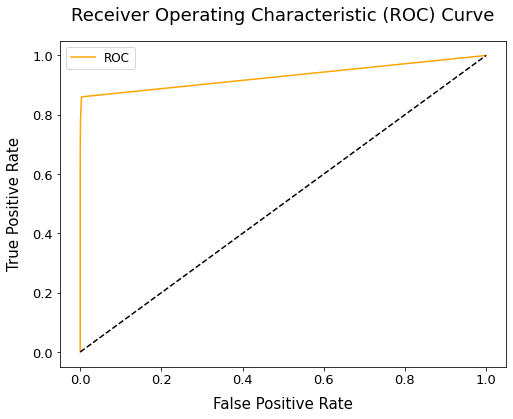

In [50]:
probs = knn.predict_proba(X_test)
probs = probs[:, 1]
auc2 = roc_auc_score(y_test, probs)
roc_auc['KNN']=np.round(auc2,3)
print('Area under the ROC Curve (AUC): %.2f' % auc2)
fpr2, tpr2, _ = roc_curve(y_test, probs)
plot_roc_curve(fpr2, tpr2)

### 3.3. Support Vector **Machine**

A Support Vector Machine (SVM) is a supervised machine learning algorithm that can be employed for both classification and regression purposes. SVMs are based on the idea of finding a hyperplane that best divides a dataset into two classes.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 2)
svm = SVC(probability=True)
svm.fit(X_train, y_train)
prediction3 = svm.predict(X_test)
accuracy3 = svm.score(X_test, y_test) 
print ('Model Accuracy:',accuracy3 * 100)

Storing model accuracy to plot for comparison with other Machine Learning models.

In [ ]:
accuracies['SVM'] = np.round(accuracy3 * 100,3)

Plotting Confusion Matrix to describe the performance of Support Vector Machine Classifier on a set of test data.

In [ ]:
conf_matrix(y_test,prediction3)

Plotting different metrics scores for the Support Vector Machine Classifier for evaluation.

In [ ]:
metrics_score(cm1)

Plotting Receiver Operating Characteristic (ROC) Curve, to illustrate the diagnostic ability of Support Vector Machine Classifier as its discrimination threshold is varied and showing the Area under the ROC Curve (AUC) value which will tell us how much our model is capable of distinguishing between Fraud and Not Fraud.

In [ ]:
probs = svm.predict_proba(X_test)
probs = probs[:, 1]
auc3 = roc_auc_score(y_test, probs)
roc_auc['SVM']=np.round(auc3,3)
print('Area under the ROC Curve (AUC): %.2f' % auc3)
fpr3, tpr3, _ = roc_curve(y_test, probs)
plot_roc_curve(fpr3, tpr3)

### 3.4. Decision Tree

Decision Trees are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 4)
dtc = DecisionTreeClassifier(random_state = 5)
dtc.fit(X_train, y_train)
prediction4 = dtc.predict(X_test)
accuracy4 = dtc.score(X_test, y_test)
print ('Model Accuracy:',accuracy4 * 100)

Model Accuracy: 99.92744756191321


Storing model accuracy to plot for comparison with other Machine Learning models.

In [ ]:
accuracies['Decision Tree'] = np.round(accuracy4 * 100,3)

Plotting Confusion Matrix to describe the performance of Decision Tree Classifier on a set of test data.

In [ ]:
conf_matrix(y_test,prediction4)

Plotting different metrics scores for the Decision Tree Classifier for evaluation.

In [ ]:
metrics_score(cm1)

Plotting Receiver Operating Characteristic (ROC) Curve, to illustrate the diagnostic ability of Decision Tree Classifier as its discrimination threshold is varied and showing the Area under the ROC Curve (AUC) value which will tell us how much our model is capable of distinguishing between Fraud and Not Fraud.

In [ ]:
probs = dtc.predict_proba(X_test)
probs = probs[:, 1]
auc4 = roc_auc_score(y_test, probs)
roc_auc['Decision Tree']=np.round(auc4,3)
print('Area under the ROC Curve (AUC): %.2f' % auc4)
fpr4, tpr4, _ = roc_curve(y_test, probs)
plot_roc_curve(fpr4, tpr4)

### 3.5. Random Forest

A Random Forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 5)
rf = RandomForestClassifier(n_estimators = 108, random_state = 5)
rf.fit(X_train, y_train)
prediction5 = rf.predict(X_test)
accuracy5 = rf.score(X_test, y_test) 
print ('Model Accuracy:',accuracy5 * 100)

Storing model accuracy to plot for comparison with other Machine Learning models.

In [ ]:
accuracies['Random Forest'] = np.round(accuracy5 * 100,3)

Plotting Confusion Matrix to describe the performance of Random Forest Classifier on a set of test data.

In [ ]:
conf_matrix(y_test,prediction5)

Plotting different metrics scores for the Random Forest Classifier for evaluation.

In [ ]:
metrics_score(cm1)

Plotting Receiver Operating Characteristic (ROC) Curve, to illustrate the diagnostic ability of Random Forest Classifier as its discrimination threshold is varied and showing the Area under the ROC Curve (AUC) value which will tell us how much our model is capable of distinguishing between Fraud and Not Fraud.

In [ ]:
probs = rf.predict_proba(X_test)
probs = probs[:, 1]
auc5 = roc_auc_score(y_test, probs)
roc_auc['Random Forest']=np.round(auc5,3)
print('Area under the ROC Curve (AUC): %.2f' % auc5)
fpr5, tpr5, _ = roc_curve(y_test, probs)
plot_roc_curve(fpr5, tpr5)

## 4. Performance Comparison

Plotting the accuracy metric score of the machine learning models for comparison.

In [ ]:
plt.figure(figsize=(15,8))
sns.set_palette('cividis')
ax=sns.barplot(x=list(accuracies.keys()),y=list(accuracies.values()))
plt.yticks(np.arange(0,100,10))
plt.ylabel('Percentage %',labelpad=10)
plt.xlabel('Algorithms',labelpad=10)
plt.title('Accuracy Scores Comparison',pad=20)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x(), p.get_height()),xytext=(p.get_x()+0.3,p.get_height()+1.02))
plt.show()

Plotting the ROC Curve of the machine learning models for comparison.

In [ ]:
plt.figure(figsize=(8,6))
sns.set_palette('Set1')
plt.plot(fpr1, tpr1, label='Logistic Regression ROC')
plt.plot(fpr2, tpr2, label='KNN ROC')
plt.plot(fpr3, tpr3, label='SVM ROC')
plt.plot(fpr4, tpr4, label='Decision Tree ROC')
plt.plot(fpr5, tpr5, label='Random Forest ROC')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.ylabel('True Positive Rate',labelpad=10)
plt.xlabel('False Positive Rate',labelpad=10)
plt.title('Receiver Operating Characteristic (ROC) Curves',pad=20)
plt.legend()
plt.show()